### This is the base model notebook

In [8]:
from sklearn.ensemble import RandomForestRegressor

kaggle_location = "mirzayasirabdullah07/student-exam-scores-dataset"
kaggle_filepath = "student_exam_scores.csv"
training_colum = "binned_scores"
selected_model = RandomForestRegressor

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score
import kaggle as kag
from kagglehub import KaggleDatasetAdapter
import kagglehub
from pprint import pprint

In [10]:
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  kaggle_location,
  kaggle_filepath,
)

/tmp/ipykernel_66556/928910658.py:1: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


In [11]:
df.head()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


<Axes: ylabel='exam_score'>

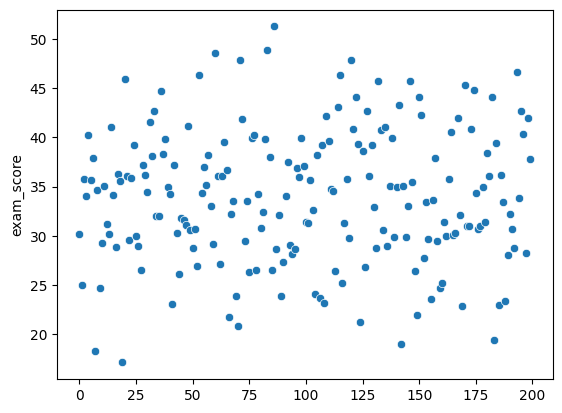

In [12]:
sns.scatterplot(df["exam_score"])

In [13]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
binned_scores = pd.cut(df["exam_score"], bins)
df["binned_scores"] = binned_scores

In [14]:
X = df.drop(columns=[training_colum, "student_id"])
y = df[training_colum]

In [15]:
OHE = OneHotEncoder()
X_encoded = OHE.fit_transform(X, y)

In [16]:
LE = LabelEncoder()
y_encoded = LE.fit_transform(y)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.25, train_size=0.75, shuffle=True)

In [18]:
model = selected_model()
model.fit(X=X_train, y=y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
y_pred = model.predict(X_test)

In [20]:
mse = mean_absolute_error(y_test, y_pred)
print(f"MSE : {mse}")

MSE : 0.4818


<Axes: >

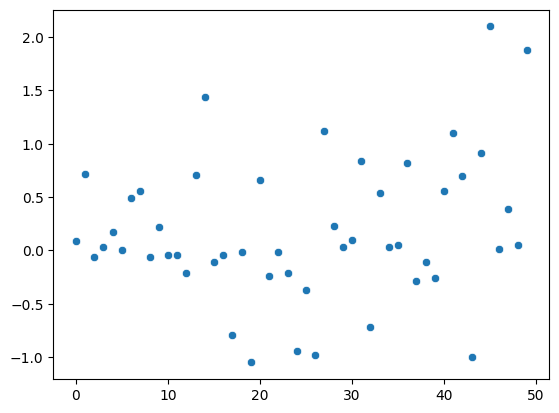

In [21]:
residuals = y_pred - y_test
sns.scatterplot(residuals)